<a href="https://colab.research.google.com/github/EdgarAgOr/FAP_Cheminformatic_PET/blob/main/4_Data_Distribution_Binding_site_vs_CHEMBL_Molecules_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit #Quimioinformática

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 10.3 MB/s eta 0:00:00


In [ ]:
#Manipulación de datos y gráficas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Quimioinformática
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem import Descriptors
PandasTools.RenderImagesInAllDataFrames(images=True) #Para visualizar moléculas

In [ ]:
FAP_CHEM = pd.read_csv('/content/Bioactividad_FAPCHEMBl_curada_data.csv')
FAP_CHEM.head()

,molecule_chemblid,canonical_smiles,bioactivity_class,standard_value,Data Set,Smiles standarization
0,CHEMBL371130,O=C(CNC1CCCCC1)N1CCC[C@H]1B(O)O,Active,650.0,CHEMBl,Nope
1,CHEMBL382974,O=C(CNC1CCCCCCC1)N1CCC[C@H]1B(O)O,Active,290.0,CHEMBl,Nope
2,CHEMBL196267,O=C(CNC1CCCCCCCCC1)N1CCC[C@H]1B(O)O,Active,530.0,CHEMBl,Nope
3,CHEMBL373269,O=C(CNC12CC3CC(CC(C3)C1)C2)N1CCC[C@@H]1B(O)O,Active,4.6,CHEMBl,Nope
4,CHEMBL372180,CCCCCC12CCC(NCC(=O)N3CCC[C@H]3B(O)O)(CC1)CC2,Active,270.0,CHEMBl,Nope


In [ ]:
FAP_BS= pd.read_csv("/content/Bioactividad_FAPBSITE_curada_activos_data.csv")

FAP_BS.head(2)

,BindingDB_id,SMILES,bioactivity_class,IC50_nM,Data Set,Smiles standarization,Patente
0,22043,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,16985.0,Bsite,Nope,No
1,22044,O=C([C@@H](C1)CN[C@@H]1C(N1CCCC1)=O)N(C1)Cc2c1...,Active,13609.0,Bsite,Nope,No


In [ ]:
FAP_Mol= pd.read_csv("/content/FAP_Radiofarmacos_curada_data.csv")

FAP_Mol.head(2)

,Compuesto,SMILES,pEC50,Data Set,bioactivity_class
0,TriOncoFAP-DOTAGA,[3H][C@]1(C#N)CC(F)(F)CN1C(=O)CNC(=O)c1ccnc2c(...,10.886057,Molecules,Active
1,P-FAPI,O=C(NCC(=O)N1CC(F)(F)C[C@@H]1C#N)c1ccnc2ccc(OC...,10.136677,Molecules,Active


In [ ]:
print(FAP_CHEM.columns)
print(FAP_BS.columns)
print(FAP_Mol.columns)

Index(['molecule_chemblid', 'canonical_smiles', 'bioactivity_class',
       'standard_value', 'Data Set', 'Smiles standarization'],
      dtype='object')
Index(['BindingDB_id', 'SMILES', 'bioactivity_class', 'IC50_nM', 'Data Set',
       'Smiles standarization', 'Patente'],
      dtype='object')
Index(['Compuesto', 'SMILES', 'pEC50', 'Data Set', 'bioactivity_class'], dtype='object')


In [ ]:
FAP_CHEM = FAP_CHEM[['molecule_chemblid', 'canonical_smiles','Data Set']]

FAP_BS= FAP_BS[['BindingDB_id', 'SMILES', 'Data Set']]

FAP_Mol = FAP_Mol[['Compuesto', 'SMILES', 'Data Set']]

In [ ]:
FAP_CHEM.columns = ["ID", "SMILES", "Data Set"]

FAP_BS.columns = ['ID', 'SMILES', 'Data Set']

FAP_Mol.columns = ['ID', 'SMILES', 'Data Set']

In [ ]:
 DATA = pd.concat([FAP_CHEM, FAP_BS, FAP_Mol], axis=0).reset_index(drop=True)

 DATA


,ID,SMILES,Data Set
0,CHEMBL371130,O=C(CNC1CCCCC1)N1CCC[C@H]1B(O)O,CHEMBl
1,CHEMBL382974,O=C(CNC1CCCCCCC1)N1CCC[C@H]1B(O)O,CHEMBl
2,CHEMBL196267,O=C(CNC1CCCCCCCCC1)N1CCC[C@H]1B(O)O,CHEMBl
3,CHEMBL373269,O=C(CNC12CC3CC(CC(C3)C1)C2)N1CCC[C@@H]1B(O)O,CHEMBl
4,CHEMBL372180,CCCCCC12CCC(NCC(=O)N3CCC[C@H]3B(O)O)(CC1)CC2,CHEMBl
...,...,...,...
1065,FAPI-55,O=C(NCC(=O)N1CC(F)(F)C[C@@H]1C#N)c1ccnc2ccc(cc...,Molecules
1066,18FFEQGP,O=C(NCC(=O)N1CCC[C@H]1C#N)c1ccnc2ccc(OCC[18F])...,Molecules
1067,FluoFAPI,O=C(NCC(=O)N1CCC[C@H]1C#N)c1ccnc2ccc(F)cc21,Molecules
1068,HBED-CC-FAPI-04,O=C(NCC(=O)N1CC(F)(F)C[C@H]1C#N)c1ccnc2ccc(OCC...,Molecules


In [ ]:
DATA["HBA"] = [Descriptors.NumHAcceptors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["HBD"] = [Descriptors.NumHDonors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["RotBonds"] = [Descriptors.NumRotatableBonds(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["LogP"] = [Descriptors.MolLogP(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["TPSA"] = [Descriptors.TPSA(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
#DATA["HetAtoms"] = [Descriptors.NumHeteroatoms(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["CSP3"] = [Descriptors.FractionCSP3(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["ARR"] = [Descriptors.NumAromaticRings(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
DATA["MW"] = [Descriptors.MolWt(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
#DATA["ALR"] = [Descriptors.NumAliphaticRings(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]
#DATA["NumRings"] = [Descriptors.RingCount(y) for y in (Chem.MolFromSmiles(x) for x in DATA["SMILES"])]

In [ ]:
DATA.head(2)

,ID,SMILES,Data Set,HBA,HBD,RotBonds,LogP,TPSA,CSP3,ARR,MW
0,CHEMBL371130,O=C(CNC1CCCCC1)N1CCC[C@H]1B(O)O,CHEMBl,4,3,4,-0.0883,72.8,0.916667,0,254.139
1,CHEMBL382974,O=C(CNC1CCCCCCC1)N1CCC[C@H]1B(O)O,CHEMBl,4,3,4,0.6919,72.8,0.928571,0,282.193


In [ ]:
dataset = DATA[["Data Set", 'HBA','HBD','RotBonds', 'LogP', 'TPSA', 'CSP3', 'MW', 'ARR']]

dataset.head(2)

,Data Set,HBA,HBD,RotBonds,LogP,TPSA,CSP3,MW,ARR
0,CHEMBl,4,3,4,-0.0883,72.8,0.916667,254.139,0
1,CHEMBl,4,3,4,0.6919,72.8,0.928571,282.193,0


<ipython-input-13-ad8aff35345e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y="TPSA", data=dataset, palette="BuPu")


<Axes: ylabel='TPSA'>

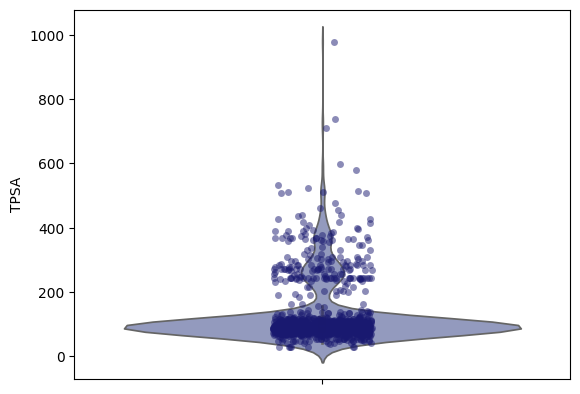

In [ ]:
#Graficar violinplot con el área de superficie polar topológica de los fármacos orales
sns.violinplot(y="TPSA", data=dataset, palette="BuPu")
#Agregar puntos para cada dato
sns.stripplot(y="TPSA", data=dataset, color='midnightblue', alpha=0.5)

<ipython-input-14-34d7d3cc3d89>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Data Set", y="CSP3", data=dataset, palette=["red", "green", "yellow"])


<Axes: xlabel='Data Set', ylabel='CSP3'>

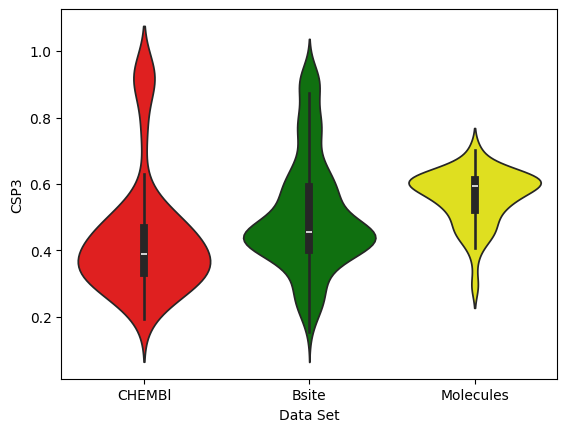

In [ ]:
#Violinplot de la fracción de carbonos sp3 por vía de administración
sns.violinplot(x="Data Set", y="CSP3", data=dataset, palette=["red", "green", "yellow"])

<ipython-input-15-486c6e927d09>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Data Set", y="HBA", data=dataset, palette=["red", "green", "yellow"])


<Axes: xlabel='Data Set', ylabel='HBA'>

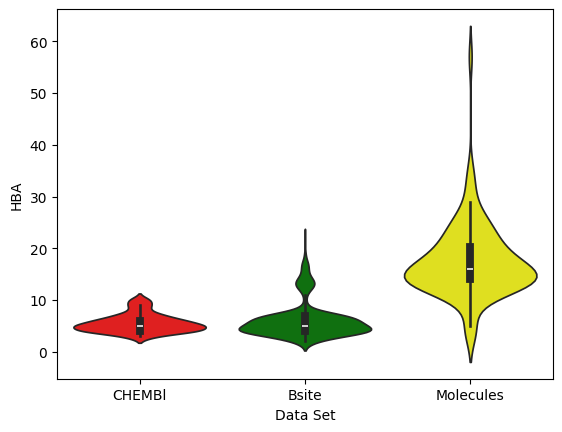

In [ ]:
#Violinplot de la fracción de carbonos sp3 por vía de administración
sns.violinplot(x="Data Set", y="HBA", data=dataset, palette=["red", "green", "yellow"])

<ipython-input-16-e91b46760992>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Data Set", y="TPSA", data=dataset, palette=["red", "green", "yellow"])


<Axes: xlabel='Data Set', ylabel='TPSA'>

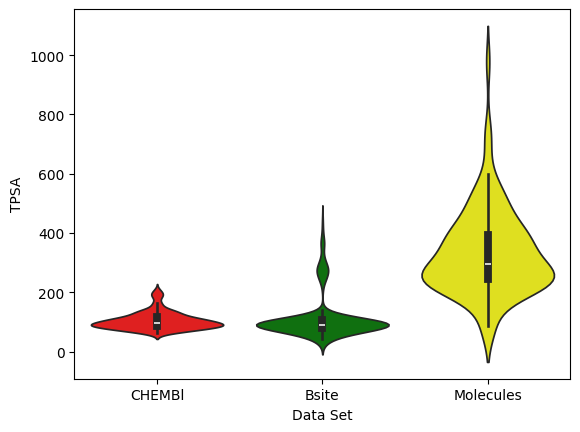

In [ ]:
#Violinplot de la fracción de carbonos sp3 por vía de administración
sns.violinplot(x="Data Set", y="TPSA", data=dataset, palette=["red", "green", "yellow"])

<ipython-input-17-60a572191735>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Data Set", y="RotBonds", data=dataset, palette=["red", "green", "yellow"])


<Axes: xlabel='Data Set', ylabel='RotBonds'>

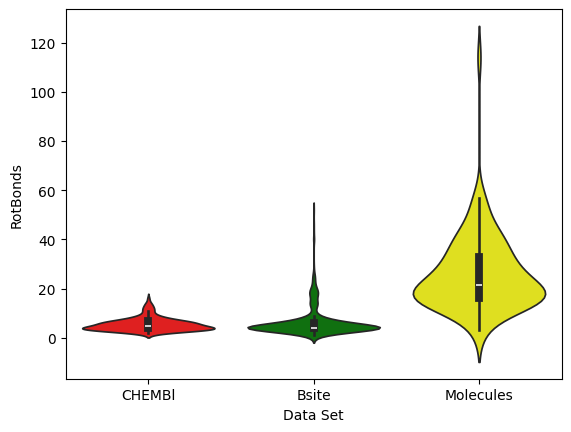

In [ ]:
#Violinplot de la fracción de carbonos sp3 por vía de administración
sns.violinplot(x="Data Set", y="RotBonds", data=dataset, palette=["red", "green", "yellow"])

<ipython-input-18-023da2d0f65d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Data Set", y="LogP", data=dataset, palette=["red", "green", "yellow"])


<Axes: xlabel='Data Set', ylabel='LogP'>

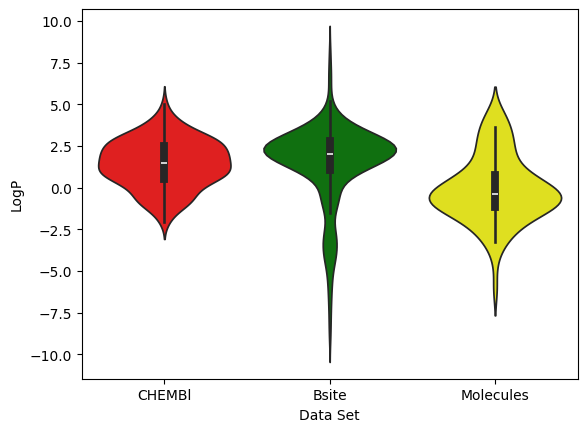

In [ ]:
#Violinplot de la fracción de carbonos sp3 por vía de administración
sns.violinplot(x="Data Set", y="LogP", data=dataset, palette=["red", "green", "yellow"])

<ipython-input-19-404bea744e2d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Data Set", y="HBD", data=dataset, palette=["red", "green", "yellow"])


<Axes: xlabel='Data Set', ylabel='HBD'>

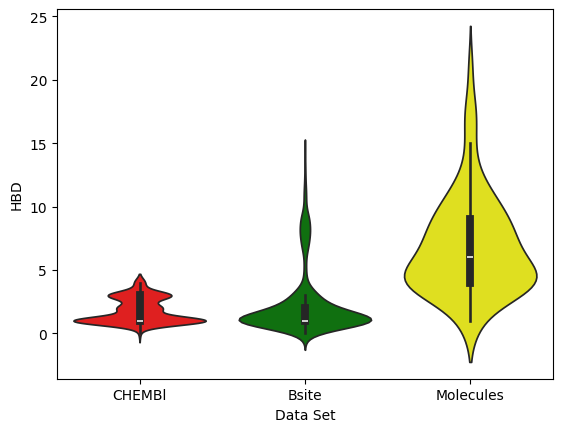

In [ ]:
#Violinplot de la fracción de carbonos sp3 por vía de administración
sns.violinplot(x="Data Set", y="HBD", data=dataset, palette=["red", "green", "yellow"])

<ipython-input-20-cb2d70080245>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Data Set", y="ARR", data=dataset, palette=["red", "green", "yellow"])


<Axes: xlabel='Data Set', ylabel='ARR'>

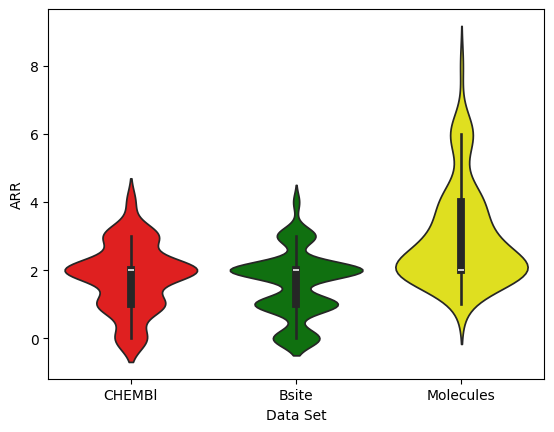

In [ ]:
#Violinplot de la fracción de carbonos sp3 por vía de administración
sns.violinplot(x="Data Set", y="ARR", data=dataset, palette=["red", "green", "yellow"])

<ipython-input-21-681f66736773>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Data Set", y="MW", data=dataset, palette=["red", "green", "yellow"])


<Axes: xlabel='Data Set', ylabel='MW'>

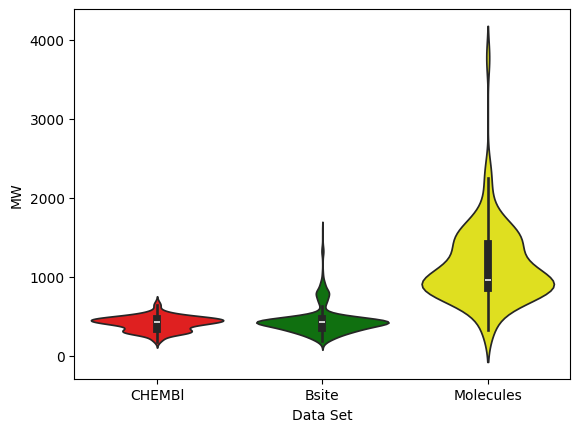

In [ ]:
#Violinplot de la fracción de carbonos sp3 por vía de administración
sns.violinplot(x="Data Set", y="MW", data=dataset, palette=["red", "green", "yellow"])
#Agregar puntos para cada dato
#sns.stripplot(x="Data Set", y="MW", data=dataset, color='midnightblue', alpha=0.5)